In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

tweets = pd.read_csv('csv/train.csv', usecols=['location', 'target'])
tweets.head()

,location,target
0,NaN,1
1,NaN,1
2,NaN,1
3,NaN,1
4,NaN,1


In [2]:
tweets = tweets.fillna(value= 'Not Especified')

In [3]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   location  7613 non-null   object
 1   target    7613 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.1+ KB


In [4]:
tweets['location'].value_counts()

Not Especified                   2533
USA                               104
New York                           71
United States                      50
London                             45
                                 ... 
North Ferriby, East Yorkshire       1
Somewhere                           1
Yewa zone                           1
DaKounty, Pa                        1
Shah Alam,Malaysia                  1
Name: location, Length: 3342, dtype: int64

In [5]:
tweets['cuantity'] = 1
tweets_by_loc= tweets.groupby('location').sum()

In [6]:
tweets_by_loc.head()

,target,cuantity
location,,
,1,1
Glasgow,0,1
"Melbourne, Australia",0,1
News,1,1
å_,0,1


In [7]:
tweets_by_loc = tweets_by_loc.sort_values('target', ascending=False)

In [8]:
tweets_by_loc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3342 entries, Not Especified to Rutherfordton, NC
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   target    3342 non-null   int64
 1   cuantity  3342 non-null   int64
dtypes: int64(2)
memory usage: 78.3+ KB


In [9]:
tweets_by_loc['Veracity Absolute Frecuency'] = tweets_by_loc['target'] / tweets_by_loc['cuantity']
tweets_by_loc.head(10)

,target,cuantity,Veracity Absolute Frecuency
location,,,
Not Especified,1075,2533,0.424398
USA,67,104,0.644231
United States,27,50,0.540000
Nigeria,22,28,0.785714
India,20,24,0.833333
Mumbai,19,22,0.863636
New York,16,71,0.225352
London,16,45,0.355556
UK,16,27,0.592593


In [10]:
cuantity_mean = tweets_by_loc['cuantity'].mean()
has_more_tweets_than_cuantity_mean = (tweets_by_loc['cuantity'] > 10)
tweets_frecuency_by_loc = tweets_by_loc[has_more_tweets_than_cuantity_mean]
del tweets_frecuency_by_loc['target']
del tweets_frecuency_by_loc['cuantity']
tweets_frecuency_by_loc = tweets_frecuency_by_loc.sort_values('Veracity Absolute Frecuency', ascending =False)
tweets_frecuency_by_loc = tweets_frecuency_by_loc.reset_index()
tweets_frecuency_by_loc.head(10)

,location,Veracity Absolute Frecuency
0,Mumbai,0.863636
1,India,0.833333
2,Nigeria,0.785714
3,Earth,0.727273
4,"Washington, DC",0.714286
5,"Washington, D.C.",0.692308
6,USA,0.644231
7,"San Francisco, CA",0.636364
8,Worldwide,0.631579
9,Indonesia,0.615385


In [11]:
del tweets_by_loc['Veracity Absolute Frecuency']
del tweets_by_loc['cuantity']

In [12]:
tweets_by_loc = tweets_by_loc.reset_index()
tweets_by_loc.head()

,location,target
0,Not Especified,1075
1,USA,67
2,United States,27
3,Nigeria,22
4,India,20


In [14]:
tweets_frecuency_by_loc['Veracity Absolute Frecuency'] = tweets_frecuency_by_loc['Veracity Absolute Frecuency'] * 100

Text(0, 0.5, 'Locacion del Tweet')

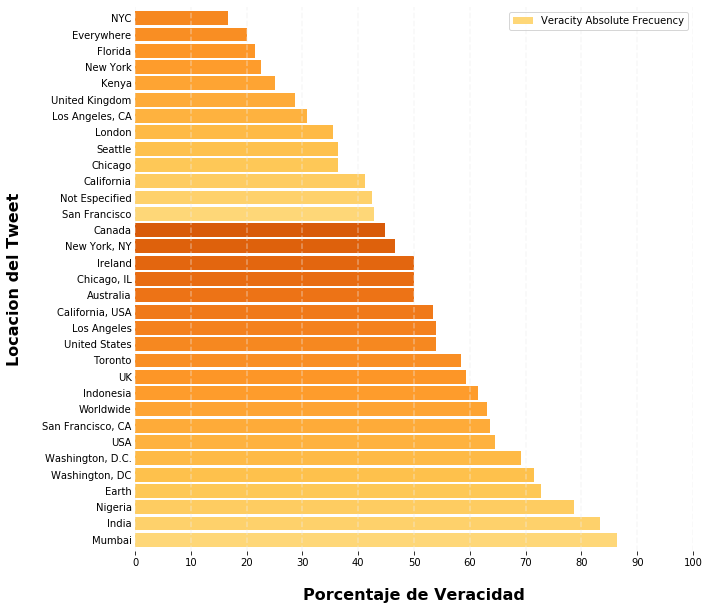

In [18]:
saltos = np.linspace(0.3, 0.7, 20)
colores = (cm.get_cmap('YlOrBr'))(saltos)
top20 = tweets_frecuency_by_loc.plot(kind='barh', y ='Veracity Absolute Frecuency', x = 'location', figsize=(10,10), color=colores, width=0.85)

plt.xticks(np.arange(0, 100+1, 10.0))
plt.tick_params(axis='y', length=0)

top20.spines['right'].set_visible(False)
top20.spines['top'].set_visible(False)
top20.spines['left'].set_visible(False)
top20.spines['bottom'].set_visible(False)

lineas = top20.get_xticks()
for i in lineas:
      top20.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
top20.set_xlabel("Porcentaje de Veracidad", labelpad=20, weight='bold', size=16)
top20.set_ylabel("Locacion del Tweet", labelpad=20, weight='bold', size=16)
